In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Loading the data

oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')


In [3]:
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
# preparing the data

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [6]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

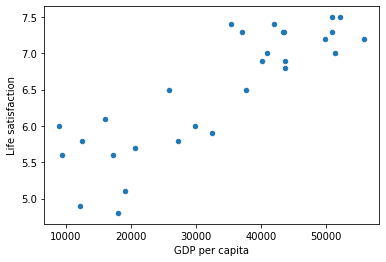

In [7]:
# Visualizing the Data

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

In [8]:
# Select the Linear Model

model = sklearn.linear_model.LinearRegression()

In [9]:
# Train the model
model.fit(X, y)

LinearRegression()

In [10]:
# Make the Prediction

X_new = [[22587]] # Cyprus' GDP per capita

In [11]:
print(model.predict(X_new))

[[5.96242338]]
